# Our first machine learning model: Logistic Regression

In [63]:
# Import our libraries 
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [64]:
# Load the titanic data set into a pandas dataframe.
Titan = pd.read_csv('data/titanic.csv')


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [91]:
# Identify which columns have null values. 
nans = Titan.isnull().sum()
print(f' {nans} | columns age, cabin and embarked have Nan Values and should not be used as feature columns')


embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [66]:
# Check to see if our data has any duplicate rows.

# False results for .duplicated() function means that the row is not a duplicate
# .value_counts() returns the numbers of trues and falses in the rows within .duplicated() 
# if needed, I can use drop_duplicates() to remove the duplicate rows
dupli_check = Titan.duplicated().value_counts()

print(f'There are no duplicate rows ')

There are no duplicate rows 


# Use sns.pariplot to visualize.
* Set the hue='survived'.

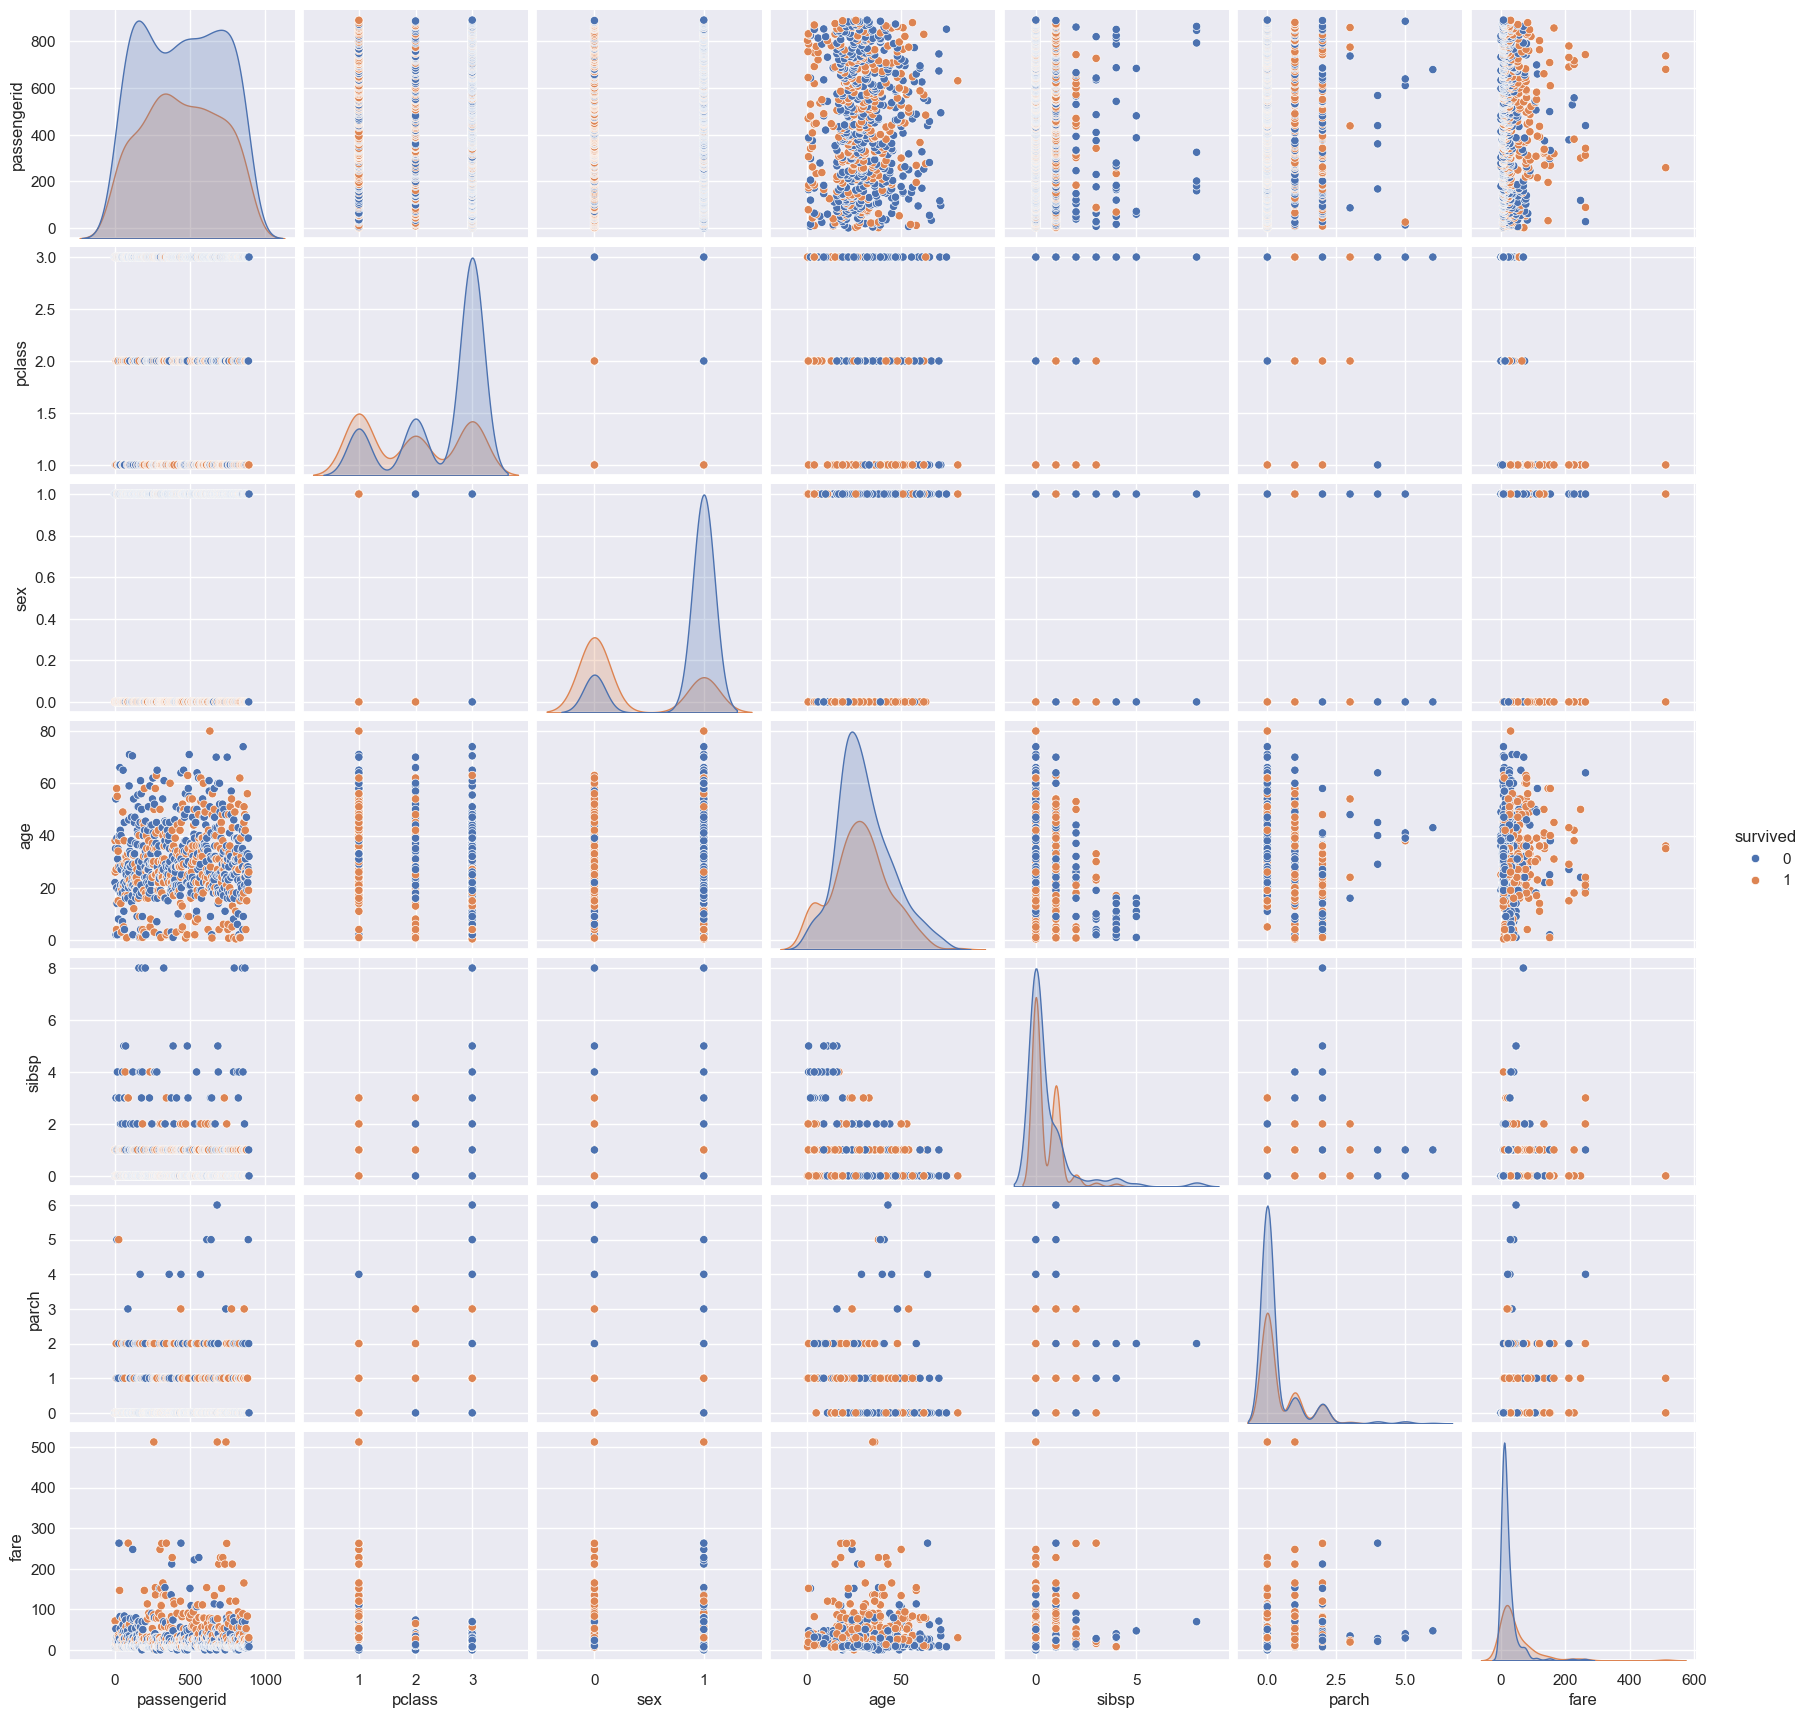

In [81]:
# Use sns.pariplot to visualize.
sns.pairplot(Titan, hue='survived')

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [79]:
# Convert the sex column into a continuous variable by using pd.get_dummies
Titan['sex'] = pd.get_dummies(Titan['sex'], drop_first=True)
test = pd.get_dummies(Titan['pclass'])
test

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
886,False,True,False
887,True,False,False
888,False,False,True
889,True,False,False


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [69]:
# Select our features
selected_features = ['fare', 'sex']

# Set X to be the features we are going to use.
X = Titan[selected_features]

# Set y to be our target variable. 
y = Titan['survived']

# Split our data into the testing and training groups. 

In [70]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(668, 2) (223, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [89]:
# Initalize our model
model = LogisticRegression()

# Train our model using our training data.
model.fit(X_train, y_train)


LogisticRegression()

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [87]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0])

In [73]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.811659
Precision Score: 0.719512
Recall Score: 0.756410
F1 Score 0.737500


Text(67.25, 0.5, 'Actual')

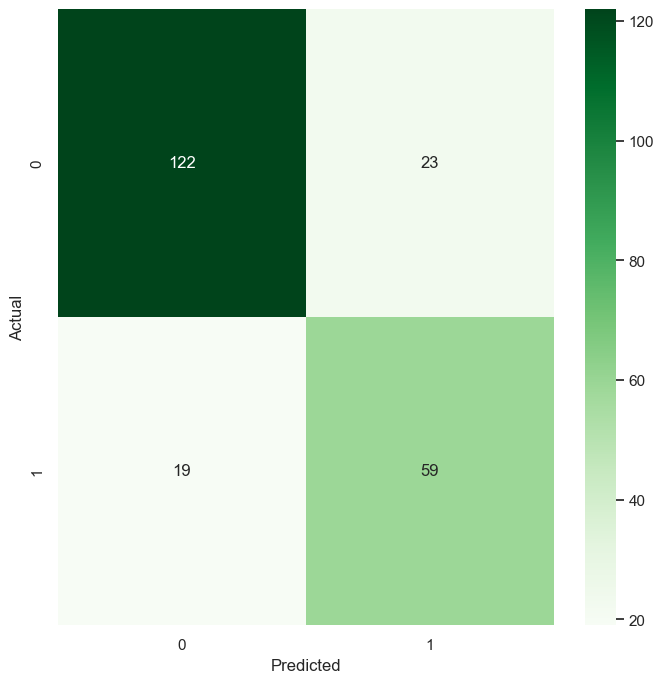

In [74]:
# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')




In [75]:
# How many True Positives and True Negatives did your model get?
print('122 True Negatives and 59 True Positives')

122 True Negatives and 59 True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

Accuracy Score: 0.834081
Precision Score: 0.759494
Recall Score: 0.769231
F1 Score 0.764331


Text(67.25, 0.5, 'Actual')

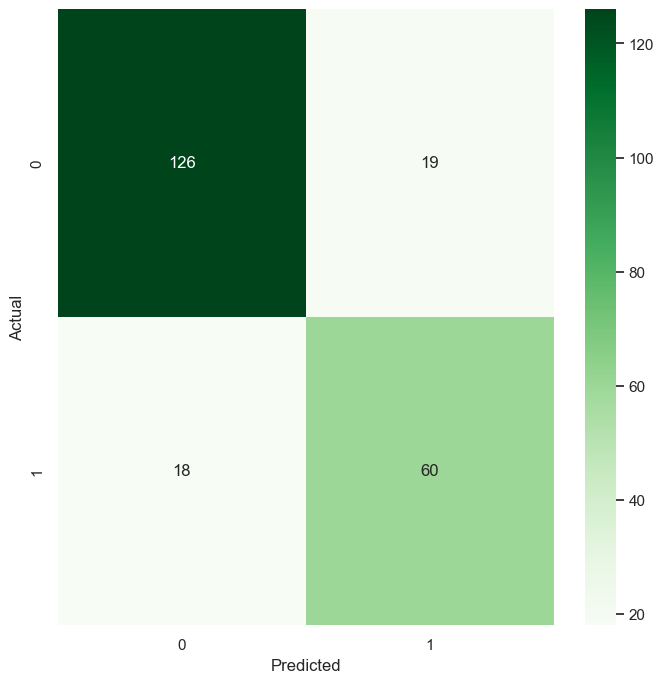

In [135]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df = pd.get_dummies(df, columns=['pclass','embarked'])
# Update your `selected_features` to include the new pclass and embarked features. 
selected_features = ['fare', 'sex_male', 'sibsp','embarked_C', 'embarked_Q', 'embarked_S', 'pclass_1', 'pclass_2', 'pclass_3']

# Define your X and y variables
X = df[selected_features]

y = df['survived']

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=45)


# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X_train2, y_train2)

# # Make new predicitions using our testing data. 
y_pred2 = model_2.predict(X_test2)
# # Calculate our accuracy
accuracy_2 = accuracy_score(y_test2,y_pred2)

# # Calculate our precision score
precision_2 = precision_score(y_test2,y_pred2)

# # Calculate our recall score
recall_2 = recall_score(y_test2,y_pred2)

# # Calculate your f1-score
f1_2 = f1_score(y_test2,y_pred2)

# # Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# # Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
cm2 = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(cm2, annot=True, cmap='Greens', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')



# EXTRA CREDIT 1. 
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [ ]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.


# Fill null age values with mean age.


# Create new traveled_alone feature


# Update your `selected_features` to include the new traveled alone and age


# Define your X and y variables


# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.

# Make new predicitions using our testing data. 


# Calculate our accuracy
accuracy_3 = 

# Calculate our precision score
precision_3 = 

# Calculate our recall score
recall_3 = 

# Calculate your f1-score
f1_3 = 

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual');

# EXTRA CREDIT 2:  

Use stats models to create a summary report.  Interpret the results. 